In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
from sklearn import decomposition
import matplotlib.pyplot as plt

In [2]:
# pre = pd.read_csv('eclass_predata.csv')
pre = pd.read_csv('anon_pre.csv')
pre.set_index('anon_student_id', inplace=True)
# post = pd.read_csv('eclass_postdata.csv')
post = pd.read_csv('anon_post.csv')
post.set_index('anon_student_id', inplace=True)

In [3]:
questions = sorted([x for x in pre.columns if 'a' in x][:-1])[:-1]

In [4]:
pre_pca_data = pre[questions].dropna()
post_pca_data = post[questions].dropna()
combined = pd.concat([pre_pca_data, post_pca_data])

In [5]:
pre_pca_data.head()

,duration,q01a,q02a,q03a,q04a,q05a,q06a,q07a,q09a,q10a,...,q21a,q22a,q23a,q24a,q25a,q26a,q27a,q28a,q29a,q30a
anon_student_id,,,,,,,,,,,,,,,,,,,,,
24620,802.0,5.0,5.0,5.0,5.0,3.0,1.0,1.0,5.0,5.0,...,5.0,5.0,3.0,1.0,5.0,5.0,3.0,1.0,3.0,3.0
24621,529.0,5.0,5.0,5.0,5.0,5.0,5.0,1.0,5.0,5.0,...,5.0,5.0,1.0,5.0,3.0,5.0,5.0,1.0,5.0,5.0
24622,507.0,5.0,5.0,3.0,5.0,5.0,5.0,1.0,3.0,5.0,...,5.0,3.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,3.0
24623,555.0,5.0,5.0,1.0,5.0,5.0,3.0,1.0,5.0,5.0,...,5.0,5.0,5.0,5.0,5.0,3.0,5.0,5.0,5.0,5.0
24625,686.0,5.0,5.0,5.0,5.0,5.0,5.0,1.0,5.0,5.0,...,5.0,1.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0


In [43]:
pre_pca_data.shape

(38137, 30)

In [44]:
post_pca_data.shape

(30142, 30)

In [6]:
pre_pca_data.columns

Index(['duration', 'q01a', 'q02a', 'q03a', 'q04a', 'q05a', 'q06a', 'q07a',
       'q09a', 'q10a', 'q11a', 'q12a', 'q13a', 'q14a', 'q15a', 'q16a', 'q17a',
       'q18a', 'q19a', 'q20a', 'q21a', 'q22a', 'q23a', 'q24a', 'q25a', 'q26a',
       'q27a', 'q28a', 'q29a', 'q30a'],
      dtype='object')

In [7]:
post_pca_data.columns

Index(['duration', 'q01a', 'q02a', 'q03a', 'q04a', 'q05a', 'q06a', 'q07a',
       'q09a', 'q10a', 'q11a', 'q12a', 'q13a', 'q14a', 'q15a', 'q16a', 'q17a',
       'q18a', 'q19a', 'q20a', 'q21a', 'q22a', 'q23a', 'q24a', 'q25a', 'q26a',
       'q27a', 'q28a', 'q29a', 'q30a'],
      dtype='object')

In [8]:
combined.columns

Index(['duration', 'q01a', 'q02a', 'q03a', 'q04a', 'q05a', 'q06a', 'q07a',
       'q09a', 'q10a', 'q11a', 'q12a', 'q13a', 'q14a', 'q15a', 'q16a', 'q17a',
       'q18a', 'q19a', 'q20a', 'q21a', 'q22a', 'q23a', 'q24a', 'q25a', 'q26a',
       'q27a', 'q28a', 'q29a', 'q30a'],
      dtype='object')

In [22]:
pca_pre = decomposition.PCA()
pca_post = decomposition.PCA()
pca_combined = decomposition.PCA()

In [23]:
pca_pre.fit(pre_pca_data[pre_pca_data.columns[1:]].values)
pca_post.fit(post_pca_data[post_pca_data.columns[1:]].values)
pca_combined.fit(combined[combined.columns[1:]].values)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

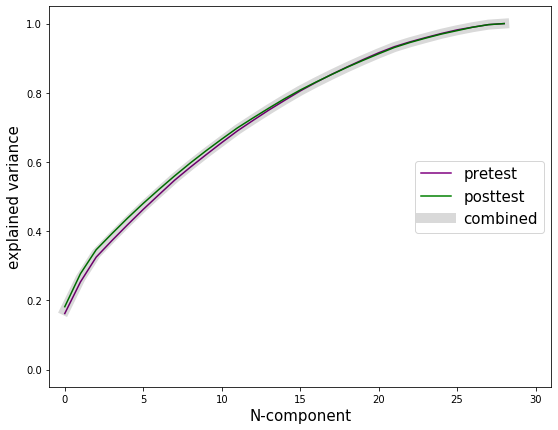

In [34]:
fig, ax = plt.subplots(figsize=(9, 7))

ax.plot(pca_pre.explained_variance_ratio_.cumsum(), label='pretest', color='purple')

ax.plot(pca_post.explained_variance_ratio_.cumsum(), label='posttest', color='green')

ax.plot(pca_combined.explained_variance_ratio_.cumsum(), label='combined', color='black', alpha=0.15, linewidth=10)

ax.set_ylabel('explained variance', fontsize=15)

# ax2 = ax.twinx()

# ax2.plot(pca_pre.explained_variance_ratio_.cumsum(), label='pretest', color='red')

# ax2.plot(pca_post.explained_variance_ratio_.cumsum(), label='posttest', color='blue')

# ax2.plot(pca_combined.explained_variance_ratio_.cumsum(), label='combined', color='black', alpha=0.25, linewidth=10)

# ax2.set_ylabel('cumulative explained variance', fontsize=15)

# ax.set_xlabel('component index', fontsize=15)

ax.legend(loc='right', fontsize=15)

# ax2.plot([-1, 31], [0.8, 0.8], linewidth=10, linestyle='--', color='purple', alpha=0.15)

ax.set_xlim(-1, 31)
ax.set_ylim(-0.05, 1.05)
ax.set_xlabel('N-component', fontsize=15)

fig.savefig('factoranalysis.pdf', bbox_inches='tight')

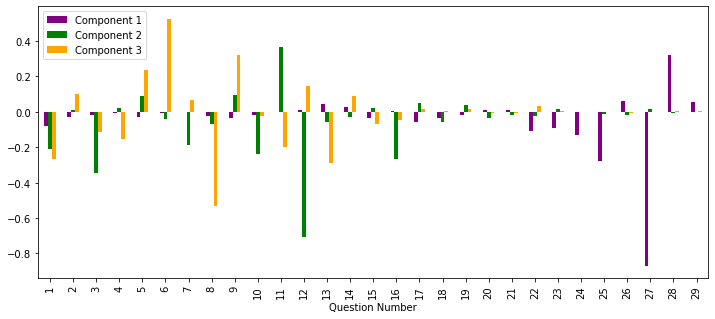

In [79]:
eigenvalues = pd.DataFrame(pca_pre.components_)
fig, ax = plt.subplots(figsize=(12, 5))
eigenvalues[[0, 1, 2]].plot.bar(ax=ax, color=['purple', 'green', 'orange'])
ax.legend(['Component 1', 'Component 2', 'Component 3'])
ax.set_xlabel('Question Number')
ax.set_xticklabels(np.arange(1, 30, 1))
fig.savefig('first3components.pdf', bbox_inches='tight')

ValueError: shape mismatch: objects cannot be broadcast to a single shape

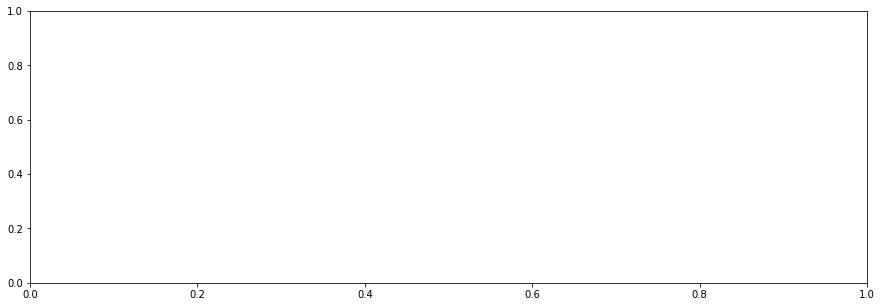

In [13]:
for n, c in enumerate(pca_combined.components_):
    fig, ax = plt.subplots(figsize=(15, 5))
    ax.bar(np.arange(30), pca_combined.components_[n])
    ax.set_xticks(np.arange(30))
    ax.set_xticklabels(questions, rotation=90, fontsize=15)
    ax.set_ylabel('component {}'.format(n), fontsize=15)

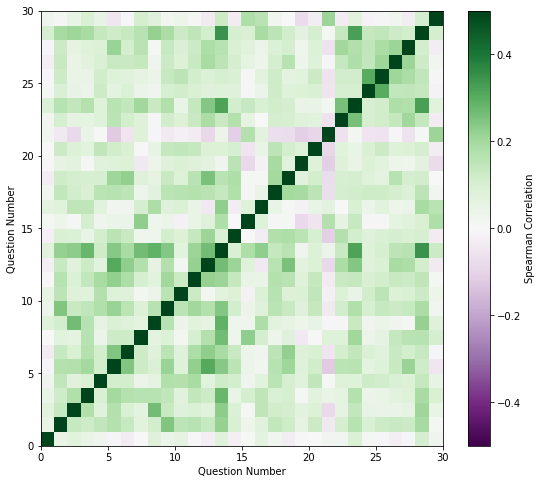

In [53]:
z = pre_pca_data.corr('spearman').values

fig, ax = plt.subplots(figsize=(9, 8))

cbar = ax.pcolormesh(z, cmap='PRGn', vmin=-0.5, vmax=0.5)
# combined.corr('spearman').describe()

fig.colorbar(cbar, label='Spearman Correlation')

ax.set_xlabel('Question Number')
ax.set_ylabel('Question Number')
fig.savefig('precorr.pdf', bbox_inches='tight')

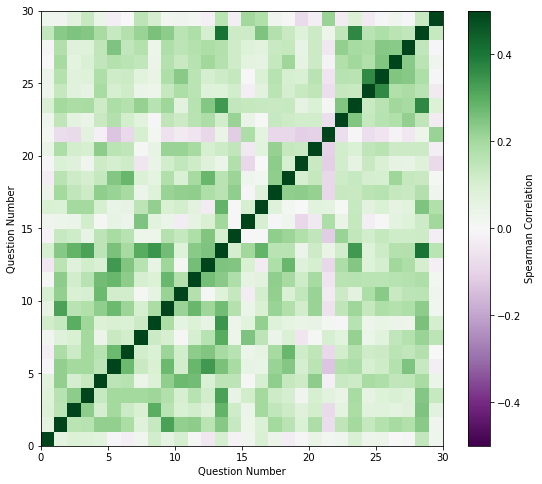

In [54]:
z = post_pca_data.corr('spearman').values

fig, ax = plt.subplots(figsize=(9, 8))

cbar = ax.pcolormesh(z, cmap='PRGn', vmin=-0.5, vmax=0.5)
# combined.corr('spearman').describe()

fig.colorbar(cbar, label='Spearman Correlation')

ax.set_xlabel('Question Number')
ax.set_ylabel('Question Number')
fig.savefig('postcorr.pdf', bbox_inches='tight')

In [42]:
z[z < 1].max()

0.3488684373021108

In [17]:
cis = pd.read_csv('anon_cis.csv')

In [18]:
mapdata = cis.round(1).groupby(['LocationLatitude', 'LocationLongitude']).count().StartDate.reset_index()
mapdata.describe()

KeyError: 'LocationLatitude'

In [13]:
import cartopy
import cartopy.crs as ccrs
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import matplotlib.ticker as mticker


ModuleNotFoundError: No module named 'cartopy'

In [ ]:
fig, ax = plt.subplots(1, figsize=(20,10))
proj = ccrs.PlateCarree() 
ax = plt.axes(projection=proj)
ax.add_feature(cartopy.feature.OCEAN            # add ocean feature
               , zorder=0                       # layer where ocean should plot; 0 is base   
               , facecolor='white'                  # color of the ocean
              ) 

ax.add_feature(cartopy.feature.LAND             # add continent feature
               , zorder=0                       # layer where continent should plot; 0 is base
               , edgecolor='black'              # coastline color
               , facecolor='lightgray'          # continent color
              )               

ax.coastlines(resolution='110m')                # the level of resolution to render the drawings, 
                                                # see documentation for more details

gl = ax.gridlines(crs=ccrs.PlateCarree()        
                , draw_labels=True              # label coordinates
                , linewidth=2                   # line properties can be changed similar to matplotlib
                , color='gray'
                , alpha=0.5
                , linestyle='--')

gl.xlabels_top = gl.ylabels_right = False                          # where labels shouldn't be
# gl.xlocator = mticker.FixedLocator([-180, -90, 0, 90, 180])        # sets longitude tick marks
gl.xlocator = mticker.FixedLocator([-180, 180])        # sets longitude tick marks
# gl.ylocator = mticker.FixedLocator(np.arange(80,-81,-20))          # sets latitude tick marks using numpy module
gl.ylocator = mticker.FixedLocator([-90, 90])          # sets latitude tick marks using numpy module
gl.xformatter = LONGITUDE_FORMATTER                                # set cartopy formatting
gl.yformatter = LATITUDE_FORMATTER
             
ax.scatter(mapdata.LocationLongitude.values, mapdata.LocationLatitude.values               # plots your data points on the axes
        , marker='o'                                 # symbol for data point
        , c='red'                               # symbol facecolor
        , edgecolor='black'                          # symbol edgecolor
        , alpha=0.95                                 # opacity
        , transform=ccrs.PlateCarree()
        , s=50*mapdata.StartDate.values)

ax.set_ylim(15, 75)
ax.set_xlim(-180, -45)

"""
try coloring by "type" of institution like 2 year, 4 year, R1, etc.
"""

In [ ]:
fig, ax = plt.subplots(figsize=(5, 25))

cis.groupby('Q3').count().StartDate.reset_index().sort_values(by='Q3', ascending=False).set_index('Q3').plot.barh(ax=ax)
ax.set_ylabel('')

In [ ]:
cis.groupby('Q11').count().StartDate.plot.barh()

In [ ]:
cis.groupby('Q4_2').count()